# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Moses Koroma

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

You should bring in code from previous assignments to help you answer the questions below.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)

In [1]:
import requests

# Step 1: Define the article URL
url = "https://a16z.com/ai-will-save-the-world/"

# Step 2: Fetch the web page
response = requests.get(url)
response.raise_for_status()

# Step 3: Save raw HTML to file
with open("article.html", "w", encoding="utf-8") as f:
    f.write(response.text)

print("Article HTML saved as article.html")


Article HTML saved as article.html


2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [2]:
from bs4 import BeautifulSoup
from textblob import TextBlob

# Step 2: Load the HTML file
with open("article.html", "r", encoding="utf-8") as f:
    html = f.read()

# Extract plain text from HTML
soup = BeautifulSoup(html, "html.parser")
article_text = soup.get_text()

# Sentiment analysis and sentence count
blob = TextBlob(article_text)

# Output polarity and number of sentences
print("Q2: Polarity Score:", blob.sentiment.polarity)
print("Q2: Number of Sentences:", len(blob.sentences))


Q2: Polarity Score: 0.08916374392068839
Q2: Number of Sentences: 333


3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [6]:
import spacy
from collections import Counter

# Load the English NLP model
nlp = spacy.load("en_core_web_sm")

# Run the NLP pipeline on your article text
doc = nlp(article_text)

# Filter out stop words and punctuation, and convert tokens to lowercase
tokens = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count token frequencies
token_freq = Counter(tokens)

# Get the 5 most common tokens
common_tokens = token_freq.most_common(5)

# Print the results
print("Top 5 Most Common Tokens (excluding stopwords & punctuation):")
for token, freq in common_tokens:
    print(f"'{token}': {freq}")


Top 5 Most Common Tokens (excluding stopwords & punctuation):
'ai': 188
'
': 167
'people': 45
'new': 38
'risk': 32


4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [7]:
import spacy
from collections import Counter

# Load spaCy English model
nlp = spacy.load("en_core_web_sm")

# Process the article text
doc = nlp(article_text)

# Extract lemmas, filtering out stopwords and punctuation
lemmas = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct]

# Count lemma frequencies
lemma_freq = Counter(lemmas)

# Get the 5 most common lemmas
common_lemmas = lemma_freq.most_common(5)

# Print results
print("Top 5 Most Common Lemmas (excluding stopwords & punctuation):")
for lemma, freq in common_lemmas:
    print(f"'{lemma}': {freq}")


Top 5 Most Common Lemmas (excluding stopwords & punctuation):
'ai': 188
'
': 167
'people': 45
'technology': 39
'new': 38


5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

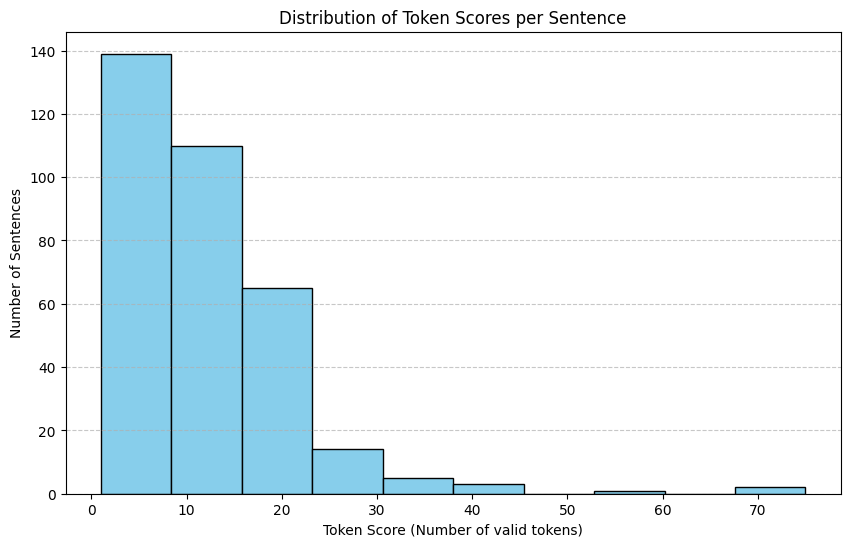

In [ ]:
import matplotlib.pyplot as plt

# Score = number of valid (non-stopword, non-punctuation) tokens per sentence
sentence_scores = []

for sent in doc.sents:
    score = sum(1 for token in sent if not token.is_stop and not token.is_punct)
    sentence_scores.append(score)

# Plotting histogram
plt.figure(figsize=(10, 6))
plt.hist(sentence_scores, bins=10, edgecolor='black', color='skyblue')
plt.title("Distribution of Token Scores per Sentence")
plt.xlabel("Token Score (Number of valid tokens)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#Based on the histogram, the most common range of sentence scores is between 5 and 15

6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

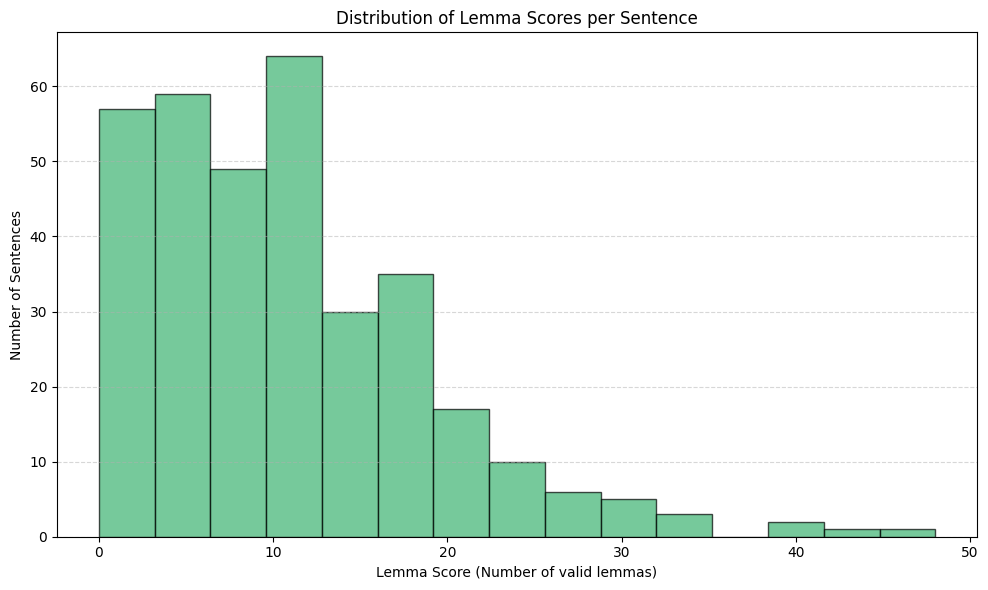

In [ ]:
import matplotlib.pyplot as plt

# Create a list of scores based on number of valid lemmas in each sentence
lemma_scores = []
for sent in doc.sents:
    lemmas = [token.lemma_ for token in sent if token.is_alpha and not token.is_stop]
    lemma_scores.append(len(lemmas))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(lemma_scores, bins=15, color='mediumseagreen', edgecolor='black', alpha=0.7)
plt.title("Distribution of Lemma Scores per Sentence")
plt.xlabel("Lemma Score (Number of valid lemmas)")
plt.ylabel("Number of Sentences")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Between 5 and 15 valid lemmas.


7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens): 
* Cutoff Score (lemmas):

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

### Question 7 – Cutoff Score Selection

After analyzing the histograms from Questions 5 and 6, I chose the following cutoff scores to ensure that fewer than half of the sentences in the article have a score greater than the cutoff.

These values will help narrow down the content when generating summaries, aiming to keep around 6 to 10 sentences total.

- **Cutoff Score (tokens):** 13  
- **Cutoff Score (lemmas):** 11

8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [12]:
# Step 1: Create summary based on token score cutoff
token_cutoff = 18  # from Q7

# Step 2: Loop through each sentence and add if it meets the token score cutoff
token_summary = []
for sent in doc.sents:
    token_score = sum(1 for token in sent if not token.is_punct and not token.is_space)
    if token_score > token_cutoff:
        token_summary.append(sent.text.strip())

# Step 3: Join the selected sentences into a full summary
summary_text = ' '.join(token_summary)

# Step 4: Print the summary
print("Summary of the Article (Token-based):")
print(summary_text)


Summary of the Article (Token-based):
Why AI Will Save the World | Andreessen Horowitz























































































































ABOUT US


News & Content


Portfolio


Team


About


Jobs


Connect




What we offer


AI


American Dynamism


Bio + Health


Consumer


Crypto


Enterprise


Fintech


Games


Infrastructure


Seed


Speedrun


Growth


Cultural Leadership Fund


Talent x Opportunity


Perennial






FOLLOW a16z





























See More Results



TOP SUGGESTIONS

AI
Machine & Deep Learning
Infrastructure
Fintech
Product, Design & Engineering
Education
Marketplaces
Web3





















Why AI Will Save the World
Marc Andreessen



share

Copy Link
Email
X
LinkedIn
Facebook
Hacker News
WhatsApp
Flipboard
Reddit












Table of Contents


Table of Contents








  Posted June 6, 2023 Fortunately, I am here to bring the good news: AI will not destroy the world, and in fact

9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [14]:
from textblob import TextBlob

# Join summary if not already joined
summary_text = ' '.join(token_summary)

# Create TextBlob object and compute polarity
summary_blob = TextBlob(summary_text)
polarity_score = summary_blob.sentiment.polarity

# Print polarity and sentence count
print("Polarity Score of the Summary:", polarity_score)
print("Number of Sentences in the Summary:", len(token_summary))


Polarity Score of the Summary: 0.0832448004245525
Number of Sentences in the Summary: 186


10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [16]:
# Make sure these are defined
sentences = list(doc.sents)

# Use your actual lemma cutoff from Q7
lemma_cutoff = 10

# Generate lemma-based summary
lemma_summary = [sent.text.strip() for sent, score in zip(sentences, lemma_scores) if score > lemma_cutoff]

# Print the joined summary
print("Summary of the Article (Lemma-based):")
print(' '.join(lemma_summary))


Summary of the Article (Lemma-based):
Why AI Will Save the World | Andreessen Horowitz























































































































ABOUT US


News & Content


Portfolio


Team


About


Jobs


Connect




What we offer


AI


American Dynamism


Bio + Health


Consumer


Crypto


Enterprise


Fintech


Games


Infrastructure


Seed


Speedrun


Growth


Cultural Leadership Fund


Talent x Opportunity


Perennial






FOLLOW a16z





























See More Results



TOP SUGGESTIONS

AI
Machine & Deep Learning
Infrastructure
Fintech
Product, Design & Engineering
Education
Marketplaces
Web3





















Why AI Will Save the World
Marc Andreessen



share

Copy Link
Email
X
LinkedIn
Facebook
Hacker News
WhatsApp
Flipboard
Reddit












Table of Contents


Table of Contents








  Posted June 6, 2023 First, a short description of what AI is: The application of mathematics and software cod

11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [17]:
from textblob import TextBlob

# Join the lemma-based summary into a single string
lemma_summary_text = ' '.join(lemma_summary)

# Run sentiment analysis on the summary
lemma_summary_blob = TextBlob(lemma_summary_text)

# Print polarity score
print("Polarity Score of Lemma-Based Summary:", lemma_summary_blob.sentiment.polarity)

# Print number of sentences in the summary
print("Number of Sentences in Lemma-Based Summary:", len(lemma_summary))


Polarity Score of Lemma-Based Summary: 0.08298112204532967
Number of Sentences in Lemma-Based Summary: 157


12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

The polarity scores of my summaries were different from the original article’s polarity. This is likely because the summaries only included the strongest, most information rich sentences the ones with higher token or lemma scores. These sentences tend to express stronger opinions or key arguments, which can shift the overall sentiment. In contrast, the full article has a mix of neutral, background, and opinionated content, so its sentiment is more balanced or neutral. By filtering for high-scoring sentences, the summaries may unintentionally amplify the emotional tone or point of view.

13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

After reading the original article, I think the lemma-based summary was slightly better. It captured more of the key themes and arguments from the article in a concise way. The lemma scoring seemed to focus more on meaningful root words rather than repeated surface-level words, which helped highlight the central points. The token-based summary was also helpful, but it included a few filler or repetitive sentences that didn’t add as much insight. I believe the lemma-based approach gave a cleaner, more accurate reflection of the article’s main ideas.